# Class Session 17 Exercise:
## Comparing the histograms of local clustering coefficients of date hubs and party hubs

load the file of hub types `shared/han_hub_data.txt` (two-column TSV file, first column is the protein name, and second column contains `date` or `party`)

In [3]:
import pandas
hub_data = pandas.read_csv("shared/han_hub_data.txt", sep="\t", names=["Protein","HubType"])

load the file of network edges `shared/han_network_edges.txt` (two-column file, with first column is the first protein in the interacting pair, and the second column is the second protein in the interacting pair)

In [4]:
edge_data = pandas.read_csv("shared/han_network_edges.txt", sep="\t", names=["ProteinA","ProteinB"])

make an undirected igraph `Graph` from the edgelist data; show summary data on the graph as a sanity-check

In [7]:
import igraph
ppi_graph = igraph.Graph.TupleList(edge_data.values.tolist(), directed=False)
ppi_graph.summary()

'IGRAPH UN-- 1346 2524 -- \n+ attr: name (v)'

get the igraph vertex indexes of the proteins that are date hubs or party hubs; as a sanity check, print out the number of date hubs and party hubs that you find

In [47]:
graph_vertices = ppi_graph.vs()["name"]
graph_vertices_df = pandas.DataFrame(pandas.Series(graph_vertices))
graph_vertices_df.columns = ["Protein"]
graph_vertices_df = graph_vertices_df.merge(hub_data, how='outer', on="Protein")
import numpy
vertex_types_np = numpy.array(graph_vertices_df["HubType"].values.tolist())
date_hub_inds = numpy.where(vertex_types_np == "date")
party_hub_inds = numpy.where(vertex_types_np == "party")

use the `transitivity` function in igraph to compute the local clustering coefficients for every vertex in the graph; print out the first six components of the vector of data returned, as a sanity check

In [46]:
ci_values = ppi_graph.transitivity_local_undirected()
ci_values_np = numpy.array(ci_values)
ci_values_date_hubs = ci_values_np[date_hub_inds]
ci_values_party_hubs = ci_values_np[party_hub_inds]

Plot the histograms of the local clustering coefficients of the "date hubs" and the "party hubs". 

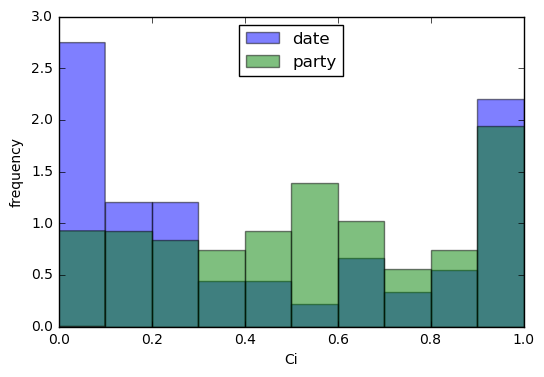

In [59]:
import matplotlib.pyplot
matplotlib.pyplot.hist(ci_values_date_hubs, normed=1, alpha=0.5, label="date")
matplotlib.pyplot.hist(ci_values_party_hubs, normed=1, alpha=0.5, label="party")
matplotlib.pyplot.legend(loc="upper center")
matplotlib.pyplot.xlabel("Ci")
matplotlib.pyplot.ylabel("frequency")
matplotlib.pyplot.show()